In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#波士顿房价数据
boston=load_boston()
x=boston.data
y=boston.target
print('波士顿数据:',x.shape)
print(x[::100])
print('波士顿房价:',y.shape)
print(y[::100])

In [ ]:
x

In [ ]:
y

In [ ]:
boston

In [14]:
# 随机挑选
train_x_disorder, test_x_disorder, train_y_disorder, test_y_disorder = train_test_split(x, y,
                                                                    train_size=0.8, random_state=33)
#数据标准化
ss_x = preprocessing.StandardScaler()
train_x_disorder = ss_x.fit_transform(train_x_disorder)
test_x_disorder = ss_x.transform(test_x_disorder)

ss_y = preprocessing.StandardScaler()
train_y_disorder = ss_y.fit_transform(train_y_disorder.reshape(-1, 1))
test_y_disorder=ss_y.transform(test_y_disorder.reshape(-1, 1))

# 多层感知器-回归模型
model_mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(20, 20, 20), random_state=1)
model_mlp.fit(train_x_disorder,train_y_disorder.ravel())
mlp_score=model_mlp.score(test_x_disorder,test_y_disorder.ravel())
print('sklearn多层感知器-回归模型得分',mlp_score)


model_gbr_disorder=GradientBoostingRegressor()
model_gbr_disorder.fit(train_x_disorder,train_y_disorder.ravel())
gbr_score_disorder=model_gbr_disorder.score(test_x_disorder,test_y_disorder.ravel())
print('sklearn集成-回归模型得分',gbr_score_disorder)#准确率较高 0.853817723868


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


sklearn多层感知器-回归模型得分 0.7123413684950344
sklearn集成-回归模型得分 0.8424360479133984


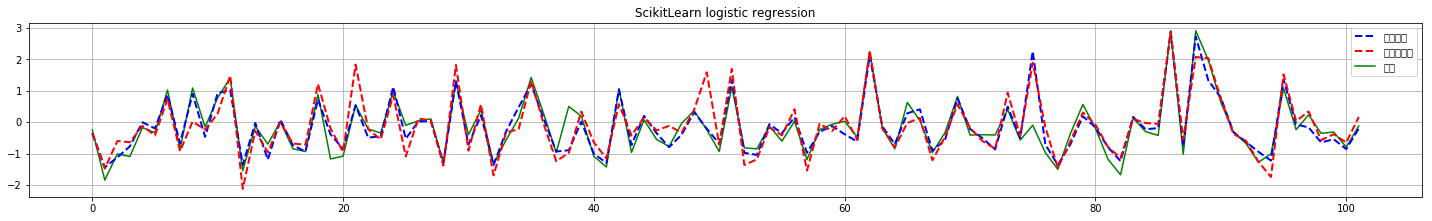

In [13]:
###画图###########################################################################
model_gbr_best=GradientBoostingRegressor(learning_rate=0.1,max_depth=6,max_features=0.5,min_samples_leaf=14,n_estimators=70)
model_gbr_best.fit(train_x_disorder,train_y_disorder.ravel() )
#使用默认参数的模型进行预测
gbr_pridict_disorder=model_gbr_disorder.predict(test_x_disorder)
#多层感知器
mlp_pridict_disorder=model_mlp.predict(test_x_disorder)

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 3))  # dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80
axes = fig.add_subplot(1, 1, 1)
line3,=axes.plot(range(len(test_y_disorder)), test_y_disorder, 'g',label='实际')
line1,=axes.plot(range(len(gbr_pridict_disorder)), gbr_pridict_disorder, 'b--',label='集成模型',linewidth=2)
line2,=axes.plot(range(len(mlp_pridict_disorder)), mlp_pridict_disorder, 'r--',label='多层感知器',linewidth=2)
axes.grid()
fig.tight_layout()
plt.legend(handles=[line1, line2,line3])
#plt.legend(handles=[line1,  line3])
plt.title('ScikitLearn logistic regression')
plt.show()